In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/EV_Population_WA_Data.csv')

In [3]:
df.shape

(200048, 17)

In [4]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EB0J,Thurston,Olympia,WA,98512.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,35.0,104823078,POINT (-122.957046 46.991391),PUGET SOUND ENERGY INC,5.306701e+10
1,WA1AAAGE9M,Kitsap,Port Orchard,WA,98367.0,2021,AUDI,E-TRON,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,222,0,35.0,156660507,POINT (-122.6530052 47.4739066),PUGET SOUND ENERGY INC,5.303509e+10
2,5YJ3E1EA2J,Yakima,Yakima,WA,98902.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,14.0,269374108,POINT (-120.530331 46.59534),PACIFICORP,5.307700e+10
3,5YJ3E1EA4N,Yakima,Yakima,WA,98902.0,2022,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,15.0,213383894,POINT (-120.530331 46.59534),PACIFICORP,5.307700e+10
4,7SAYGAEE2P,Snohomish,Bothell,WA,98012.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,229496046,POINT (-122.206146 47.839957),PUGET SOUND ENERGY INC,5.306105e+10


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200048 entries, 0 to 200047
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         200048 non-null  object 
 1   County                                             200044 non-null  object 
 2   City                                               200044 non-null  object 
 3   State                                              200048 non-null  object 
 4   Postal Code                                        200044 non-null  float64
 5   Model Year                                         200048 non-null  int64  
 6   Make                                               200048 non-null  object 
 7   Model                                              200048 non-null  object 
 8   Electric Vehicle Type                              200048 non-null  object

In [6]:
df.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,200044.000000,200048.000000,200048.000000,200048.000000,199606.000000,2.000480e+05,2.000440e+05
mean,98176.178121,2020.871261,53.485279,947.551913,28.986063,2.262988e+08,5.297545e+10
std,2424.207811,2.994933,88.786301,7860.591091,14.908108,7.282433e+07,1.605628e+09
min,1731.000000,1997.000000,0.000000,0.000000,1.000000,4.385000e+03,1.001020e+09
25%,98052.000000,2019.000000,0.000000,0.000000,17.000000,1.904573e+08,5.303301e+10
50%,98125.000000,2022.000000,0.000000,0.000000,33.000000,2.363396e+08,5.303303e+10
75%,98372.000000,2023.000000,53.000000,0.000000,42.000000,2.609659e+08,5.305307e+10
max,99577.000000,2025.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.602100e+10


Missing Values

In [7]:
df.isnull().sum()

,0
VIN (1-10),0
County,4
City,4
State,0
Postal Code,4
Model Year,0
Make,0
Model,0
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


In [8]:
# Drop rows with critical missing values (like VIN)
df = df.dropna(subset=['VIN (1-10)'])

# For missing county/city data, we'll fill with 'Unknown'
df['County'] = df['County'].fillna('Unknown')
df['City'] = df['City'].fillna('Unknown')

# For missing electric range, we'll fill with 0 (assuming unknown range)
df['Electric Range'] = df['Electric Range'].fillna(0)

In [9]:
# Convert Model Year to integer
df['Model Year'] = df['Model Year'].astype(int)

# Ensure Postal Code is string (not numeric)
df['Postal Code'] = df['Postal Code'].astype(str)

# Convert Base MSRP to numeric (handling non-numeric values)
df['Base MSRP'] = pd.to_numeric(df['Base MSRP'], errors='coerce').fillna(0)

In [12]:
df['VIN (1-10)'] = df['VIN (1-10)'].str.strip().str.upper()

In [13]:
# Check for duplicate VINs (should be unique)
duplicate_vins = df.duplicated(subset=['VIN (1-10)'], keep=False)
print(f"Number of duplicate VINs: {duplicate_vins.sum()}")

# If duplicates exist, we'll keep the first occurrence
df = df.drop_duplicates(subset=['VIN (1-10)'], keep='first')

Number of duplicate VINs: 0


In [14]:
# Create age of vehicle (current year - model year)
current_year = pd.Timestamp.now().year
df['Vehicle Age'] = current_year - df['Model Year']

# Create a binary flag for Tesla vehicles
df['Is Tesla'] = df['Make'].apply(lambda x: 1 if x == 'TESLA' else 0)

# Categorize electric range into bins
df['Range Category'] = pd.cut(df['Electric Range'],
                             bins=[-1, 0, 50, 100, 200, 300, 1000],
                             labels=['Unknown', '0-50', '50-100', '100-200', '200-300', '300+'])

<ipython-input-15-075cff685cd3>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_makes.index, y=top_makes.values, palette="viridis")


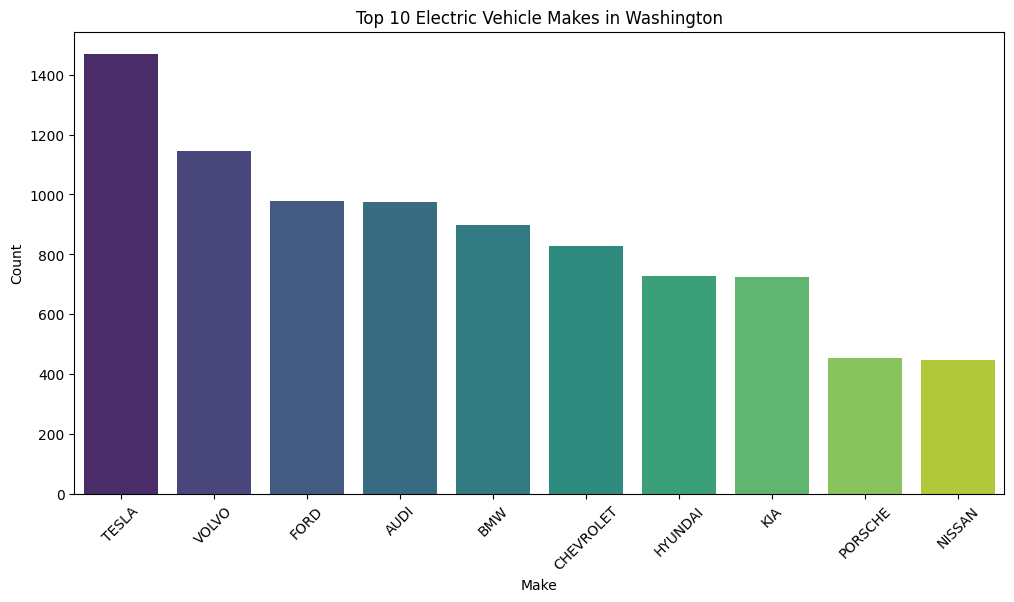

In [15]:
# Top 10 EV makes
top_makes = df['Make'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_makes.index, y=top_makes.values, palette="viridis")
plt.title('Top 10 Electric Vehicle Makes in Washington')
plt.xlabel('Make')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

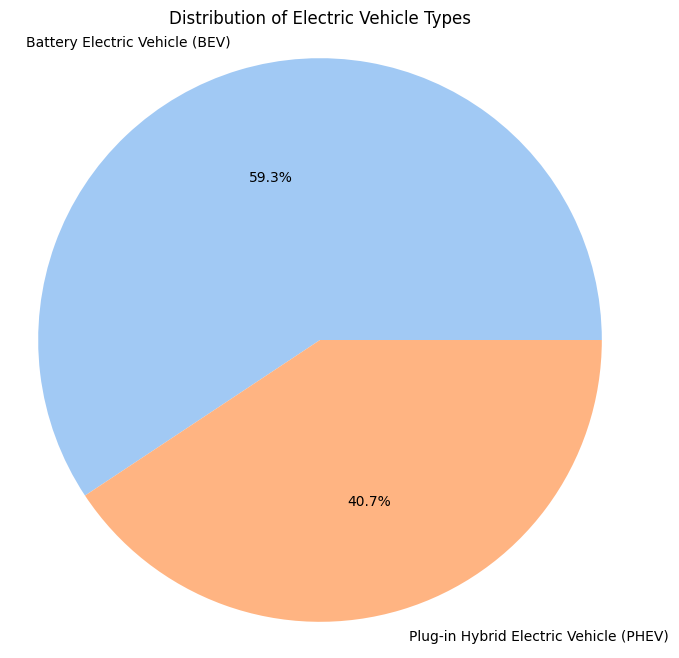

In [16]:
# EV type distribution
ev_type = df['Electric Vehicle Type'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(ev_type, labels=ev_type.index, autopct='%1.1f%%',colors=sns.color_palette('pastel'))
plt.axis('equal')
plt.title('Distribution of Electric Vehicle Types')
plt.show()

<ipython-input-17-92de1e63d8d9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Model Year', data=df, order=sorted(df['Model Year'].unique()),palette="coolwarm")


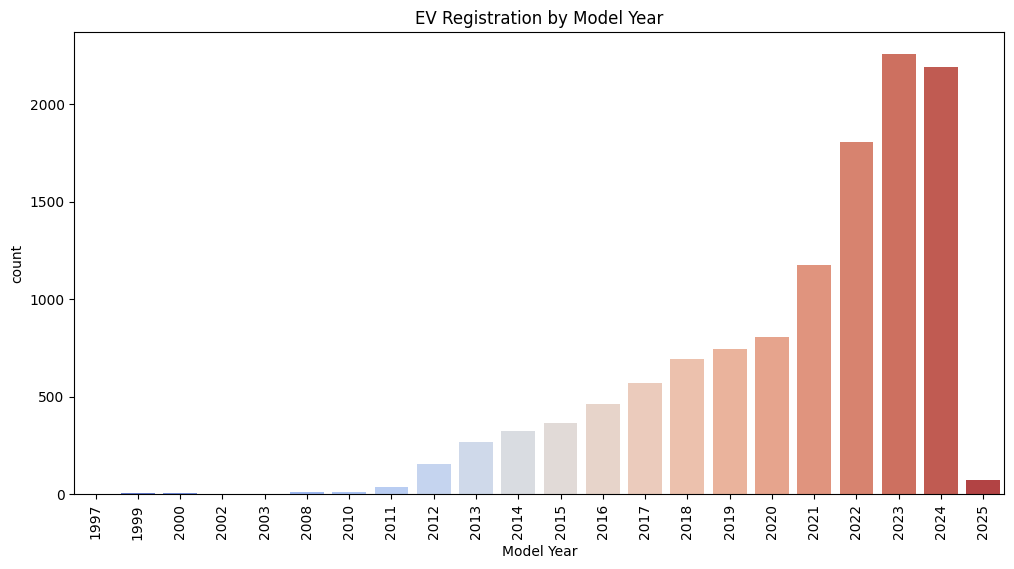

In [17]:
# Model year distribution
plt.figure(figsize=(12, 6))
sns.countplot(x='Model Year', data=df, order=sorted(df['Model Year'].unique()),palette="coolwarm")
plt.title('EV Registration by Model Year')
plt.xticks(rotation=90)
plt.show()

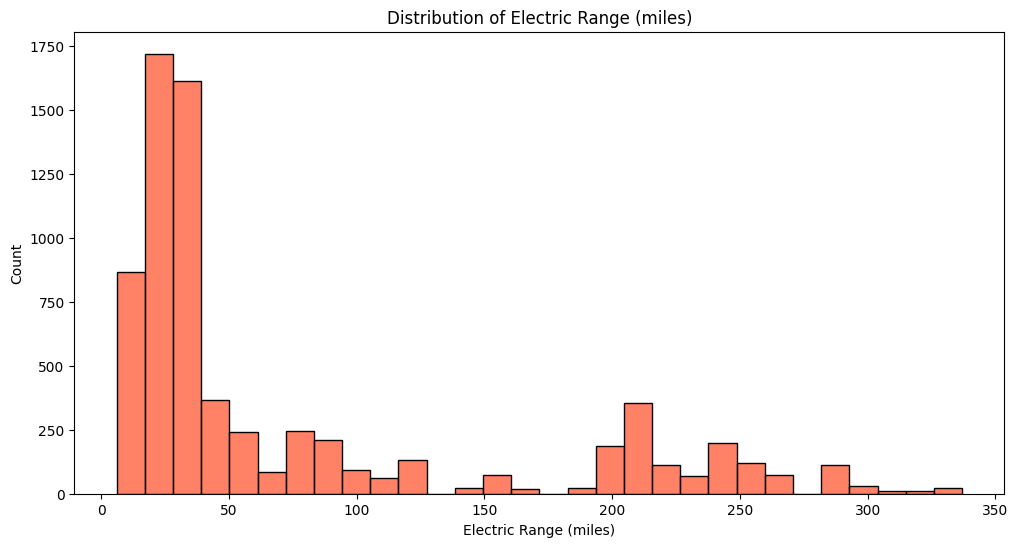

In [18]:
# Electric range distribution
plt.figure(figsize=(12, 6))
sns.histplot(data=df[df['Electric Range'] > 0], x='Electric Range', bins=30, color="#FF5733")
plt.title('Distribution of Electric Range (miles)')
plt.xlabel('Electric Range (miles)')
plt.show()

<ipython-input-19-29c19ed25f99>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=range_by_make.index, y=range_by_make.values,palette="magma")


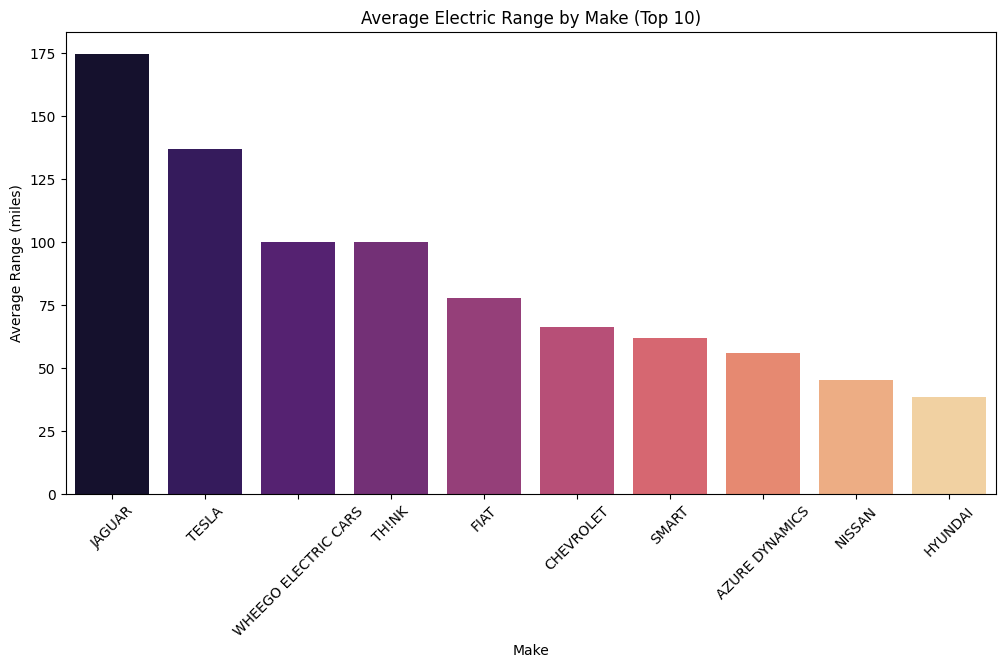

In [19]:
# Average range by make
range_by_make = df.groupby('Make')['Electric Range'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=range_by_make.index, y=range_by_make.values,palette="magma")
plt.title('Average Electric Range by Make (Top 10)')
plt.xlabel('Make')
plt.ylabel('Average Range (miles)')
plt.xticks(rotation=45)
plt.show()

<ipython-input-20-cec7dfc09cae>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_counties.index, y=top_counties.values,palette="plasma")


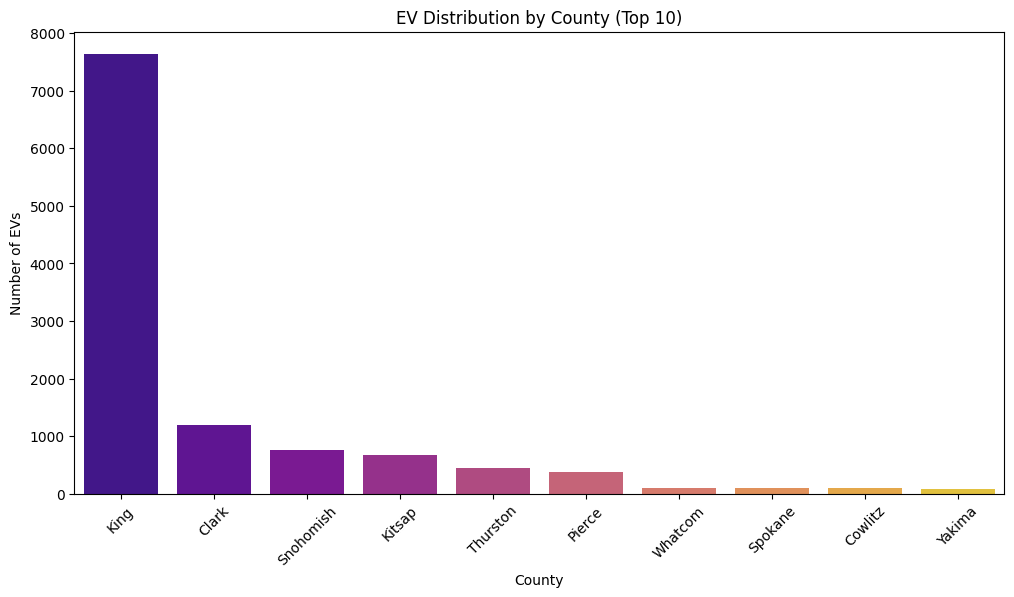

In [20]:
# EVs by county
top_counties = df['County'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_counties.index, y=top_counties.values,palette="plasma")
plt.title('EV Distribution by County (Top 10)')
plt.xlabel('County')
plt.ylabel('Number of EVs')
plt.xticks(rotation=45)
plt.show()

<ipython-input-21-99c6646272f3>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cafv.index, y=cafv.values,palette="cividis")


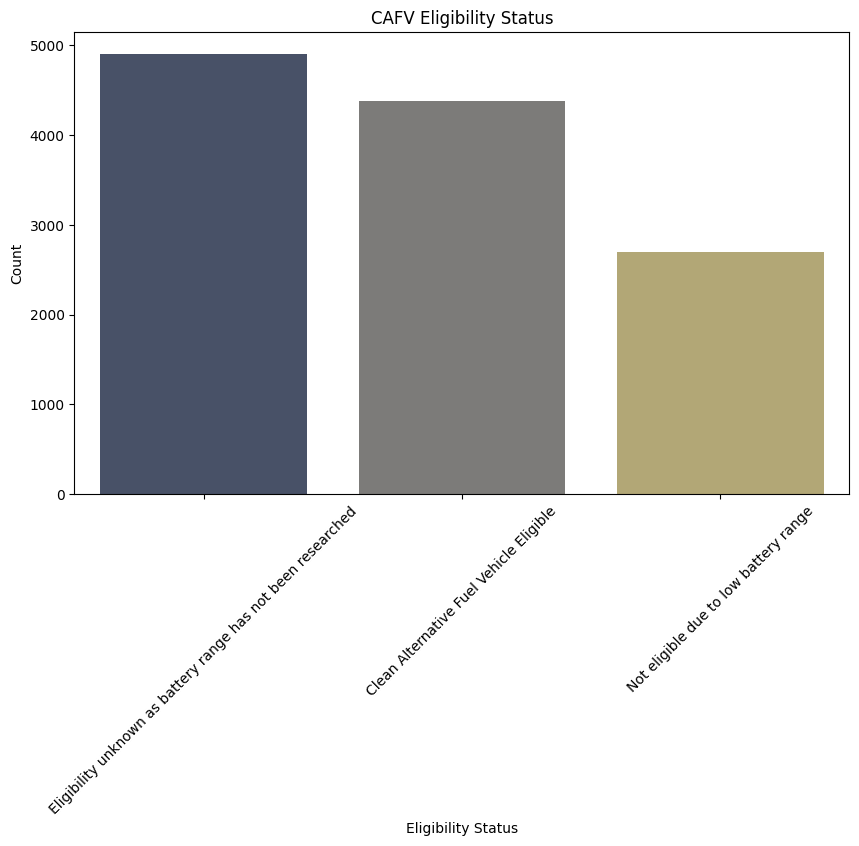

In [21]:
# CAFV eligibility status
cafv = df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=cafv.index, y=cafv.values,palette="cividis")
plt.title('CAFV Eligibility Status')
plt.xlabel('Eligibility Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

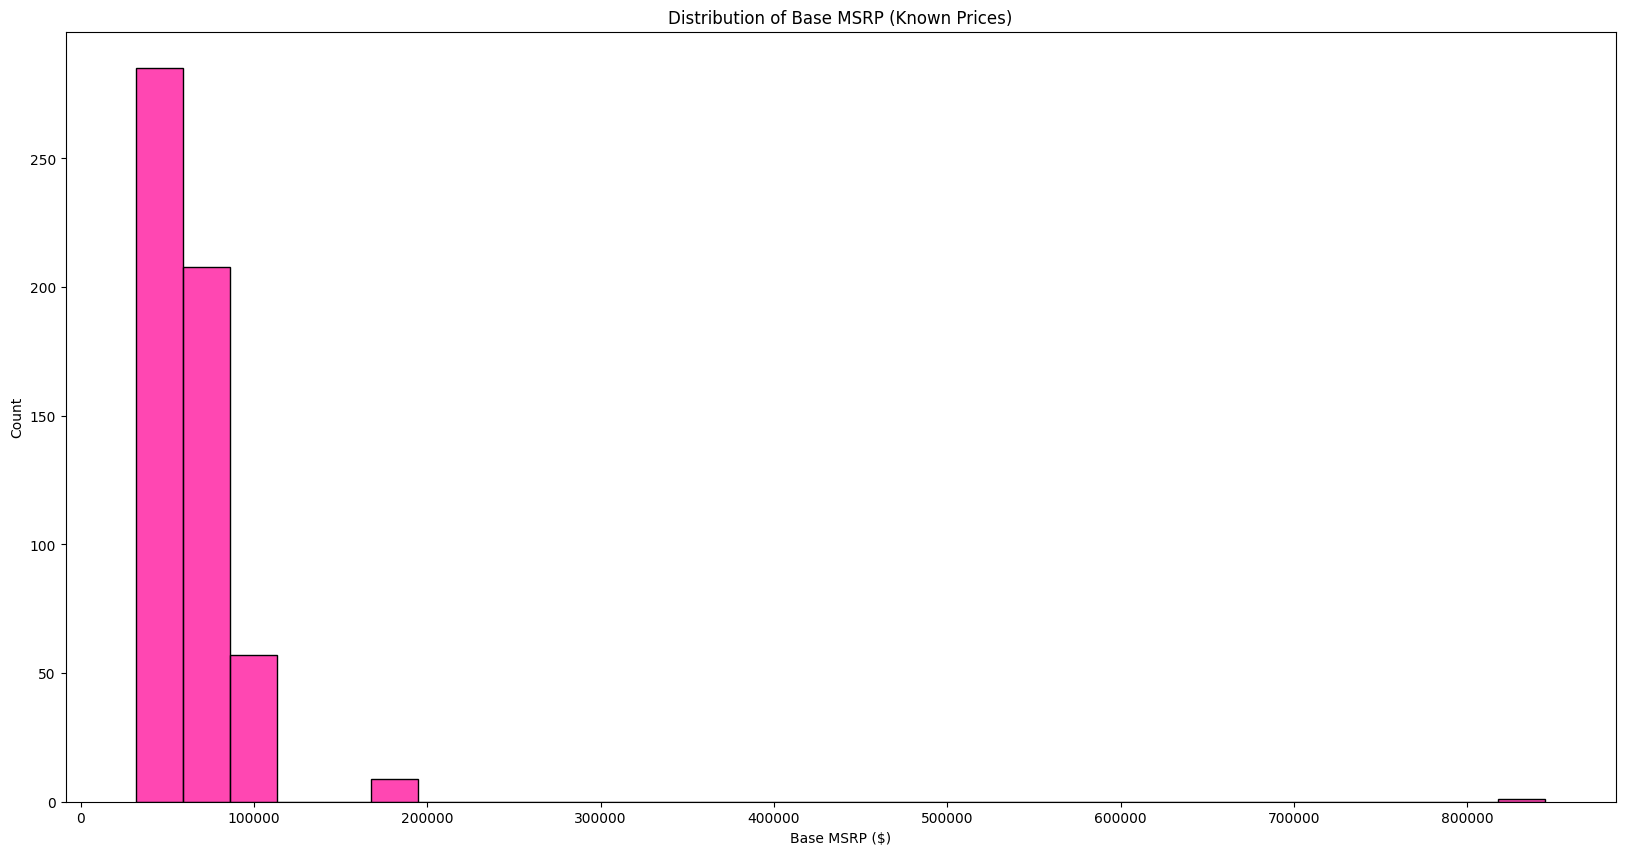

<ipython-input-22-c4aa2a5d98db>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=price_by_make.index, y=price_by_make.values,palette="viridis")


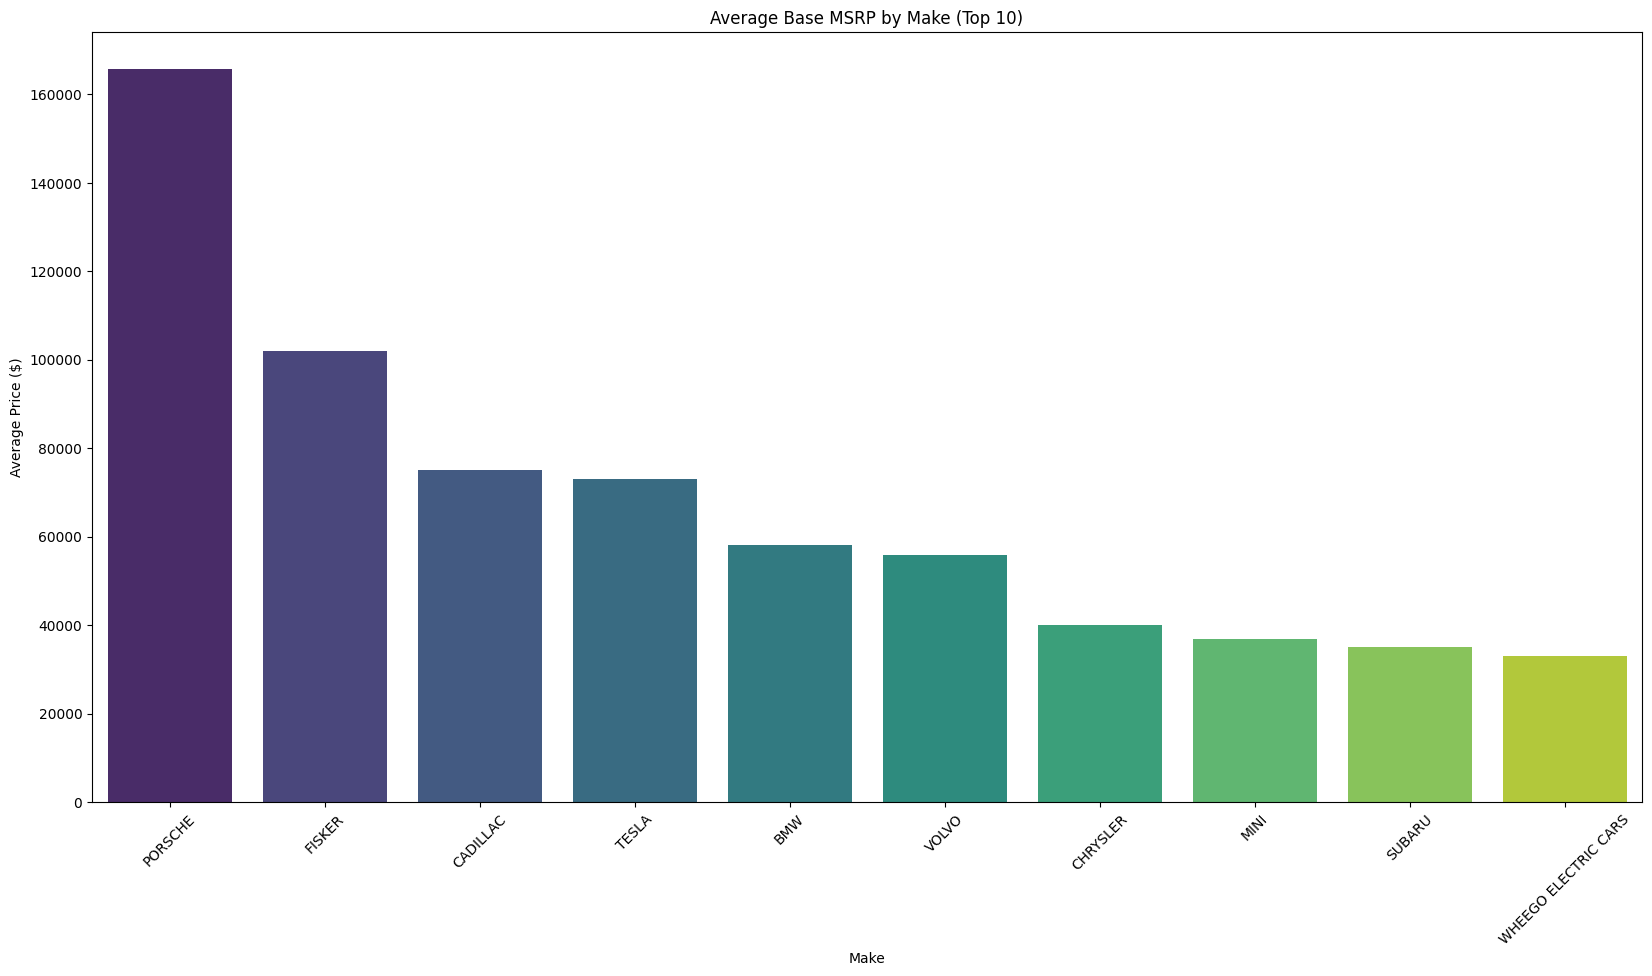

In [22]:
# Price distribution (excluding zeros/unknowns)
price_data = df[df['Base MSRP'] > 0]['Base MSRP']

plt.figure(figsize=(20, 10))
sns.histplot(price_data, bins=30,color="#FF0999")
plt.title('Distribution of Base MSRP (Known Prices)')
plt.xlabel('Base MSRP ($)')
plt.show()

# Average price by make
price_by_make = df[df['Base MSRP'] > 0].groupby('Make')['Base MSRP'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(20, 10))
sns.barplot(x=price_by_make.index, y=price_by_make.values,palette="viridis")
plt.title('Average Base MSRP by Make (Top 10)')
plt.xlabel('Make')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45)
plt.show()